In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/CyberAttackCTI/4th_Objective/LabelEncodingBasedAnalysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

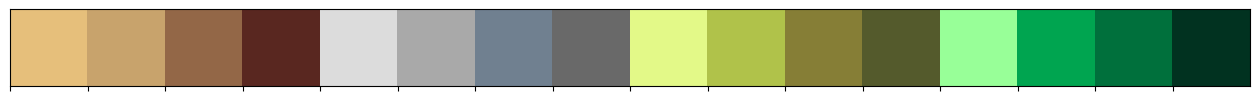

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [3]:
path=os.getcwd()
path

'C:\\Users\\SS-Computer\\CyberAttackCTI\\4th_Objective\\LabelEncodingBasedAnalysis'

# Denial-of-service (DoS) attack Analysis

## Dataset

In [51]:
df= pd.read_csv(path + '/Label_Encoding_of_Vulnerable_Events_for_DoS_attack.csv')

In [52]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Scenario,DoS_attack_event,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,Scenario_1,Non_DoS_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Scenario_2,Non_DoS_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Scenario_3,Non_DoS_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Scenario_4,Non_DoS_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,Scenario_5,Non_DoS_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [53]:
df = df.drop('Scenario',axis=1)
df = df.drop('DoS_attack_event',axis=1)
df.head()

,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [54]:
X = df.drop('Label_of_events',axis=1)
y = df['Label_of_events']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=20)

In [56]:
df['Label_of_events'].value_counts()

Label_of_events
0    37
1     4
Name: count, dtype: int64

In [57]:
X_train.head()

,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
24,1,3,1,0,0,0,0,1,0,0,2,2,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32,1,4,1,0,2,2,2,0,0,0,0,0,0,1,3
10,1,1,1,0,1,1,1,2,1,0,0,0,0,0,0
25,1,3,1,0,1,1,1,2,0,0,3,3,0,0,0


In [58]:
X_test.head()

,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
4,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
36,1,3,1,0,2,2,2,1,0,0,6,6,0,0,0
17,1,2,1,0,1,1,1,0,0,4,0,0,2,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2


In [59]:
y_train.head()

24    0
12    0
32    1
10    0
25    0
Name: Label_of_events, dtype: int64

In [60]:
y_test

4     0
36    0
17    0
1     0
13    0
33    1
40    0
14    0
3     0
Name: Label_of_events, dtype: int64

## Extra Trees ( extremely randomized trees) for DoS Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


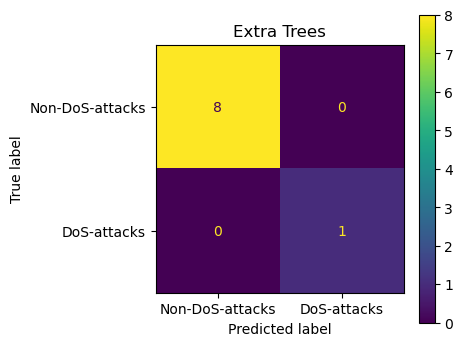

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train), pos_label="1"))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier), pos_label="1"))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))
#pos_label="Attack"

cm = confusion_matrix(y_test,y_pred_ExtraTreesClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-DoS-attacks','DoS-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Extra Trees')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## XGBoost (eXtreme Gradient Boosting) for DoS Attack

 Train set score: 0.91
 Accuracy Score : 0.89
 Precision Score: 0.00
 Recall Score   : 0.00
 f1 Score       : 0.00 

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9
 

 Confusion Matrix:
 [[8 0]
 [1 0]]


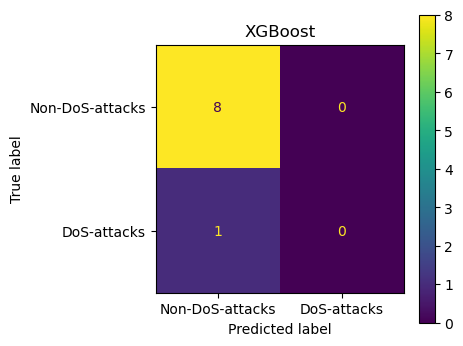

True positive =  0
False negative =  1
False positive =  0
True negative =  8


In [68]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

cm = confusion_matrix(y_test,y_pred_XGBClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-DoS-attacks','DoS-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('XGBoost')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Random Forest for DoS Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


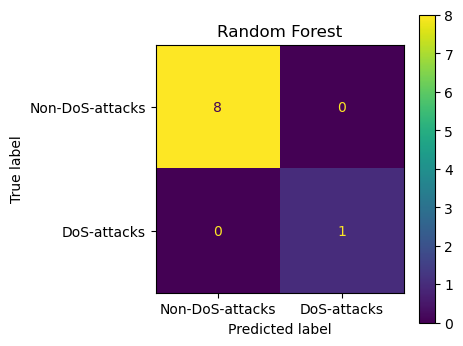

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [70]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-DoS-attacks','DoS-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Random Forest')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Bootstrap aggregating (Bagging) for DoS Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


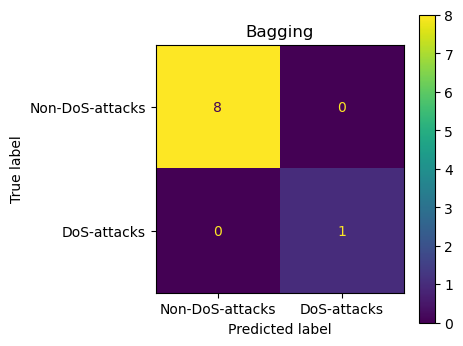

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [76]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))

cm = confusion_matrix(y_test,y_pred_BaggingClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-DoS-attacks','DoS-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Bagging')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Logistic regression for DoS Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


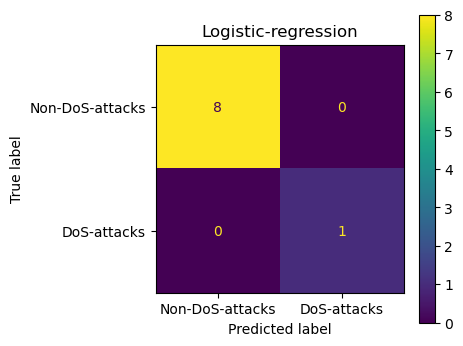

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [74]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))

cm = confusion_matrix(y_test,y_pred_LogisticRegression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-DoS-attacks','DoS-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Logistic-regression')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# False-Data-Injection Attack (FDIA) Analysis

## Dataset

In [101]:
df= pd.read_csv(path + '/Label_Encoding_of_Vulnerable_Events_for_FDIA_attack.csv')

In [102]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Scenario,False_data_injection_attack(FDIA)_event,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,Scenario_1,Non_FDIA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Scenario_2,Non_FDIA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Scenario_3,Non_FDIA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Scenario_4,Non_FDIA_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,Scenario_5,Non_FDIA_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [103]:
df = df.drop('Scenario',axis=1)
df = df.drop('False_data_injection_attack(FDIA)_event',axis=1)
df.head()

,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [104]:
X = df.drop('Label_of_events',axis=1)
y = df['Label_of_events']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=30)

df['Label_of_events'].value_counts()

Label_of_events
0    35
1     6
Name: count, dtype: int64

## Extra Trees ( extremely randomized trees) for FDIA Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[6 0]
 [0 3]]


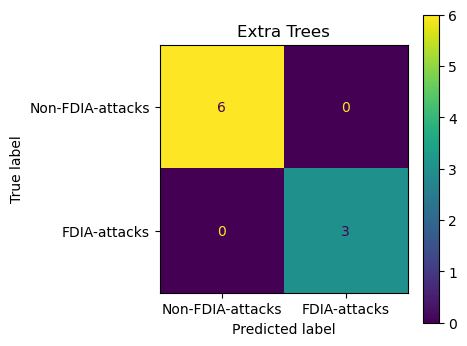

True positive =  3
False negative =  0
False positive =  0
True negative =  6


In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train), pos_label="1"))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier), pos_label="1"))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))
#pos_label="Attack"

cm = confusion_matrix(y_test,y_pred_ExtraTreesClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-FDIA-attacks','FDIA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Extra Trees')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## XGBoost (eXtreme Gradient Boosting) for FDIA

 Train set score: 0.91
 Accuracy Score : 0.67
 Precision Score: 0.00
 Recall Score   : 0.00
 f1 Score       : 0.00 

 Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9
 

 Confusion Matrix:
 [[6 0]
 [3 0]]


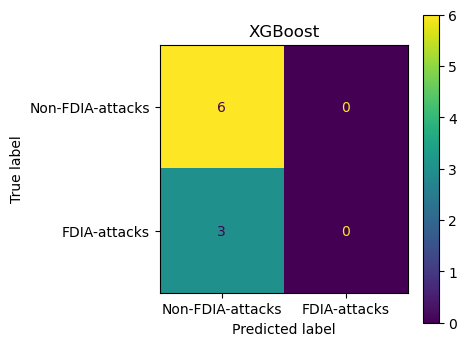

True positive =  0
False negative =  3
False positive =  0
True negative =  6


In [106]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

cm = confusion_matrix(y_test,y_pred_XGBClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-FDIA-attacks','FDIA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('XGBoost')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Random Forest for FDIA

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[6 0]
 [0 3]]


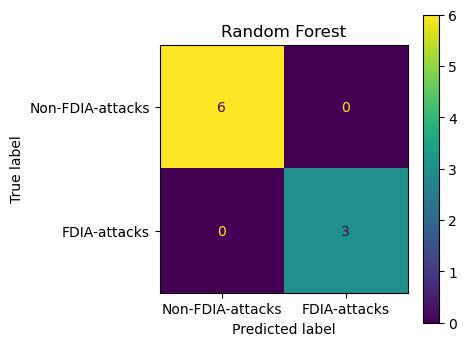

True positive =  3
False negative =  0
False positive =  0
True negative =  6


In [107]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-FDIA-attacks','FDIA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Random Forest')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Bootstrap aggregating (Bagging) for FDIA

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[6 0]
 [0 3]]


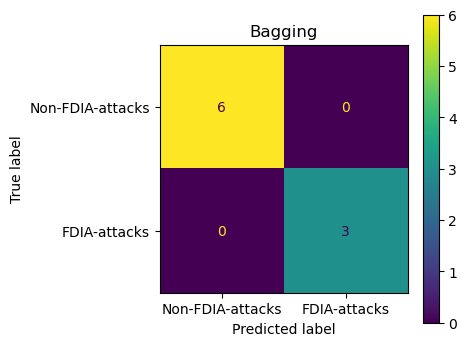

True positive =  3
False negative =  0
False positive =  0
True negative =  6


In [108]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))


cm = confusion_matrix(y_test,y_pred_BaggingClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-FDIA-attacks','FDIA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Bagging')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Logistic regression for FDIA

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[6 0]
 [0 3]]


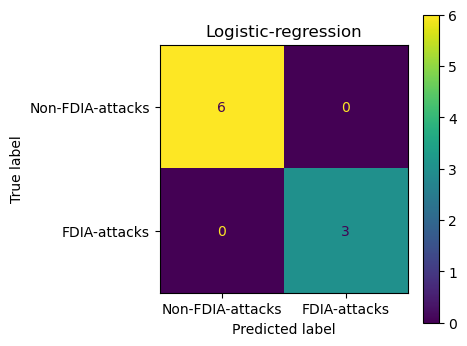

True positive =  3
False negative =  0
False positive =  0
True negative =  6


In [109]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))

cm = confusion_matrix(y_test,y_pred_LogisticRegression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-FDIA-attacks','FDIA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Logistic-regression')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# System-Reconfiguration Attack (SRA) Analysis

## Dataset

In [110]:
df= pd.read_csv(path + '/Label_Encoding_of_Vulnerable_Events_for_SRA_attack.csv')
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Scenario,System_reconfiguration_attack(SRA)_event,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,Scenario_1,Non_SRA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Scenario_2,Non_SRA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Scenario_3,Non_SRA_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Scenario_4,Non_SRA_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,Scenario_5,Non_SRA_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [111]:
df = df.drop('Scenario',axis=1)
df = df.drop('System_reconfiguration_attack(SRA)_event',axis=1)
df.head()

,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [112]:
X = df.drop('Label_of_events',axis=1)
y = df['Label_of_events']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=30)

df['Label_of_events'].value_counts()

Label_of_events
0    25
1    16
Name: count, dtype: int64

## Extra Trees ( extremely randomized trees) for SRA Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[5 0]
 [0 4]]


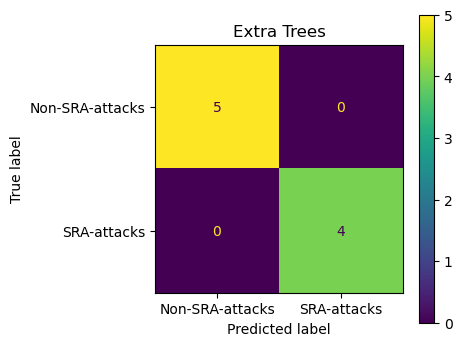

True positive =  4
False negative =  0
False positive =  0
True negative =  5


In [113]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train), pos_label="1"))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier), pos_label="1"))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))
#pos_label="Attack"

cm = confusion_matrix(y_test,y_pred_ExtraTreesClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SRA-attacks','SRA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Extra Trees')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## XGBoost (eXtreme Gradient Boosting) for SRA Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[5 0]
 [0 4]]


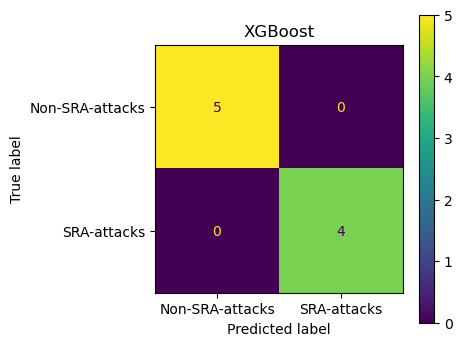

True positive =  4
False negative =  0
False positive =  0
True negative =  5


In [114]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

cm = confusion_matrix(y_test,y_pred_XGBClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SRA-attacks','SRA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('XGBoost')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Random Forest for SRA Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[5 0]
 [0 4]]


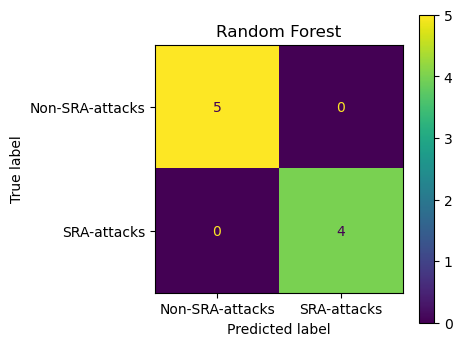

True positive =  4
False negative =  0
False positive =  0
True negative =  5


In [115]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SRA-attacks','SRA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Random Forest')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Bootstrap aggregating (Bagging) for SRA Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[5 0]
 [0 4]]


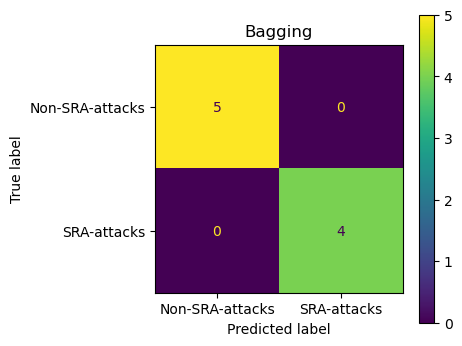

True positive =  4
False negative =  0
False positive =  0
True negative =  5


In [116]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))

cm = confusion_matrix(y_test,y_pred_BaggingClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SRA-attacks','SRA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Bagging')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Logistic regression for DoS Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[5 0]
 [0 4]]


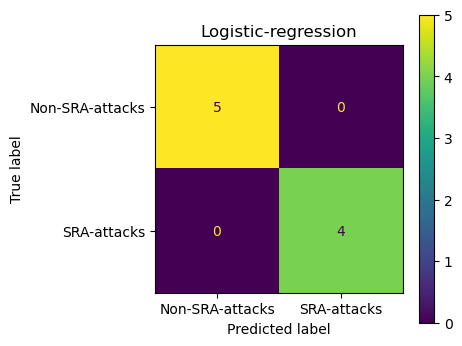

True positive =  4
False negative =  0
False positive =  0
True negative =  5


In [117]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))

cm = confusion_matrix(y_test,y_pred_LogisticRegression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SRA-attacks','SRA-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Logistic-regression')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# Remote-Tripping Command-Injection (RTCI) Analysis

## Dataset

In [118]:
df= pd.read_csv(path + '/Label_Encoding_of_Vulnerable_Events_for_RTCI_attack.csv')
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Scenario,Remote_tripping_command_injection(RTCI)_event,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,Scenario_1,Non_RTCI_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Scenario_2,Non_RTCI_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Scenario_3,Non_RTCI_attack,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Scenario_4,Non_RTCI_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,Scenario_5,Non_RTCI_attack,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [119]:
df = df.drop('Scenario',axis=1)
df = df.drop('Remote_tripping_command_injection(RTCI)_event',axis=1)
df.head()

,Label_of_events,Vulnerable_event_type,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [120]:
X = df.drop('Label_of_events',axis=1)
y = df['Label_of_events']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=40)

df['Label_of_events'].value_counts()

Label_of_events
0    35
1     6
Name: count, dtype: int64

## Extra Trees ( extremely randomized trees) for RTCI Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


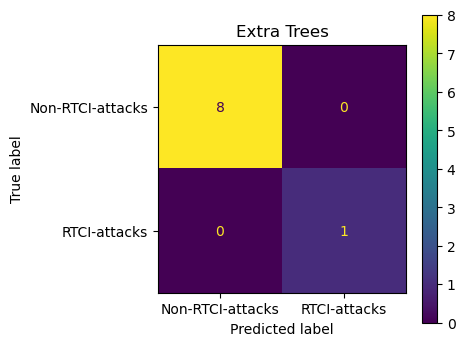

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [122]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train), pos_label="1"))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier), pos_label="1"))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))
#pos_label="Attack"

cm = confusion_matrix(y_test,y_pred_ExtraTreesClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-RTCI-attacks','RTCI-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Extra Trees')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## XGBoost (eXtreme Gradient Boosting) for RTCI Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


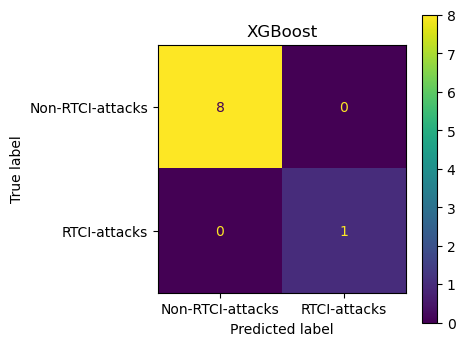

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [123]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

cm = confusion_matrix(y_test,y_pred_XGBClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-RTCI-attacks','RTCI-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('XGBoost')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Random Forest for RTCI Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


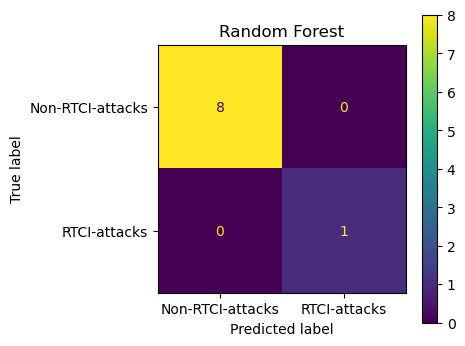

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [124]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-RTCI-attacks','RTCI-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Random Forest')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Bootstrap aggregating (Bagging) for RTCI Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


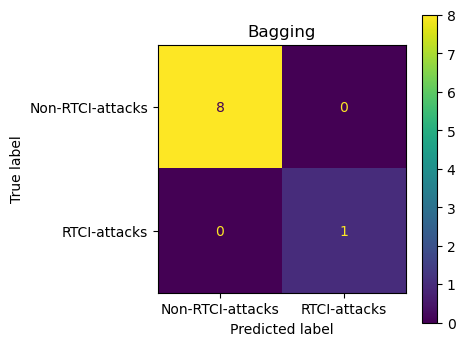

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [125]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))

cm = confusion_matrix(y_test,y_pred_BaggingClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-RTCI-attacks','RTCI-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Bagging')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

## Logistic regression for RTCI Attack

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[8 0]
 [0 1]]


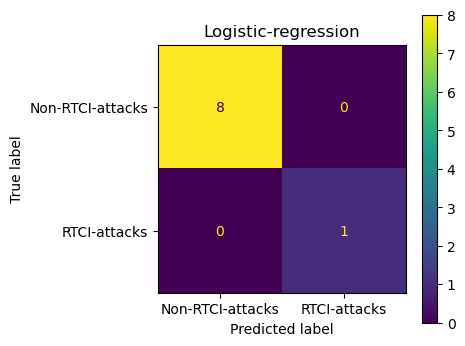

True positive =  1
False negative =  0
False positive =  0
True negative =  8


In [126]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))

cm = confusion_matrix(y_test,y_pred_LogisticRegression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-RTCI-attacks','RTCI-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Logistic-regression')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])